### Data Analysis Project

+ This project analyzes an insurance dataset ('Insurance_Data.csv') to classify and segment customers based on various attributes like income, education, and insurance contributions. We will apply supervised learning for classification and unsupervised learning for clustering to explore customer subtypes and natural groupings.


### Introduction

+ Understanding customer profiles is essential in the insurance industry for developing tailored services and predicting customer behavior. This project focuses on analyzing an insurance dataset to classify and segment customers based on various attributes. The dataset, 'Insurance_Data.csv,' contains 5,521 observations and 83 variables, including the target variable `Customer_Type`.

+ The dataset includes information such as household size, education level, income, social class, and insurance contributions across different policy types like car, life, disability, and property insurance. The primary objective of this analysis is to classify customers into relevant subtypes and identify natural groupings using clustering techniques.

+ This project involves both supervised learning for classification and unsupervised learning for segmentation. The analysis will include data exploration, cleaning, feature engineering, model training, and evaluation. Finally, we will perform clustering to explore how customer types group naturally in the dataset and compare the results with the classification outcomes.


### Load The Dataset

+ Importing the dataset 'Insurance_Data.CSV' for exploration.
+ Summarize the information in the dataset

In [3]:
import pandas as pd
import numpy as np
import os
import shutil

print(os.listdir())

['report_example.tex', '.DS_Store', 'Data Mining Lab', 'DataMiningAssignment.ipynb', 'Insurance_Data.csv', 'report_example.bib', '.ipynb_checkpoints', 'Advanced Data Analysis Exercise-CW2.pdf', 'Reasonable structure.pdf']


In [5]:
path = 'Insurance_Data.csv'
Insurance_df = pd.read_csv(path)

### Read the Dataset

+ First, we obtained the dataset, and now we need to analyze its contents, focusing on the features and attributes it contains.

We used the info() method to gain an overview of the dataset. This includes details about the number of entries, the data types of each feature, and the count of non-null values for each attribute. This helps us understand the structure of the dataset and identify any potential issues, such as missing data

In [710]:
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 83 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Customer_Type                                    5521 non-null   object 
 1   Number_of_Houses                                 5521 non-null   int64  
 2   Avg_Household_Size                               5521 non-null   int64  
 3   Avg_Age                                          5507 non-null   object 
 4   Household_Profile                                5521 non-null   object 
 5   Married                                          5521 non-null   int64  
 6   Living_Together                                  5521 non-null   int64  
 7   Other_Relation                                   5521 non-null   int64  
 8   Singles                                          5521 non-null   int64  
 9   Household_Without_Children    

We used the describe() method to generate a statistical summary of the dataset. This provides key metrics such as the mean, standard deviation, minimum, maximum, and quartiles for numerical features. 

In [713]:
Insurance_df.describe()

,Number_of_Houses,Avg_Household_Size,Married,Living_Together,Other_Relation,Singles,Household_Without_Children,Household_With_Children,High_Education_Level,Medium_Education_Level,...,Number_Private_Accident_Insurances,Number_Family_Accident_Insurances,Number_Disability_Insurances,Number_Fire_Insurances,Number_Surfboard_Insurances,Number_Boat_Insurances,Number_Bicycle_Insurances,Number_Property_Insurances,Number_Social_Security_Insurances,Number_Mobile_Home_Policies
count,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,...,5489.000000,5489.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5472.000000,5472.000000,5447.000000
mean,1.111393,2.681217,6.188372,0.883354,2.285999,1.879732,3.234559,4.302844,1.459699,3.355733,...,0.005283,0.006012,0.004890,0.569100,0.000543,0.005796,0.032965,0.008224,0.014254,0.060217
std,0.410128,0.790448,1.902710,0.967486,1.713935,1.794827,1.619696,2.006947,1.615106,1.764348,...,0.072501,0.077311,0.079477,0.559809,0.023306,0.080549,0.215353,0.092321,0.120081,0.237910
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,6.000000,1.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,7.000000,1.000000,3.000000,3.000000,4.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,5.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [715]:
Insurance_df.columns

Index(['Customer_Type', 'Number_of_Houses', 'Avg_Household_Size', 'Avg_Age',
       'Household_Profile', 'Married', 'Living_Together', 'Other_Relation',
       'Singles', 'Household_Without_Children', 'Household_With_Children',
       'High_Education_Level', 'Medium_Education_Level', 'Low_Education_Level',
       'High_Status', 'Entrepreneur', 'Farmer', 'Middle_Management',
       'Skilled_Labourers', 'Unskilled_Labourers', 'Social_Class_A',
       'Social_Class_B1', 'Social_Class_B2', 'Social_Class_C',
       'Social_Class_D', 'Rented_House', 'Home_Owner', 'Owns_One_Car',
       'Owns_Two_Cars', 'Owns_No_Car', 'National_Health_Insurance',
       'Private_Health_Insurance', 'Income_Less_Than_30K', 'Income_30K_to_45K',
       'Income_45K_to_75K', 'Income_75K_to_122K', 'Income_Above_123K',
       'Average_Income', 'Purchasing_Power_Class',
       'Private_Third_Party_Insurance_Contribution',
       'Business_Third_Party_Insurance_Contribution',
       'Agricultural_Third_Party_Insurance_

Seperate the Categorical Columns and Numerical Columns

In [9]:
Categorical_Columns = Insurance_df.select_dtypes(include = 'object').columns.tolist()

In [11]:
Numerical_Columns = Insurance_df.select_dtypes(include = 'number').columns.tolist()

In [1866]:
print(Insurance_df.shape)

(5521, 83)


In [1868]:
Insurance_df[Categorical_Columns].nunique()

Customer_Type                                       5
Avg_Age                                             6
Household_Profile                                  10
Private_Third_Party_Insurance_Contribution          4
Business_Third_Party_Insurance_Contribution         7
Agricultural_Third_Party_Insurance_Contribution     4
Mobile_Home_Policies                                2
dtype: int64

In [1201]:
# To view the first 5 rows from the dataset, to have an idea of the values
Insurance_df.head()

,Customer_Type,Number_of_Houses,Avg_Household_Size,Avg_Age,Household_Profile,Married,Living_Together,Other_Relation,Singles,Household_Without_Children,...,Number_Family_Accident_Insurances,Number_Disability_Insurances,Number_Fire_Insurances,Number_Surfboard_Insurances,Number_Boat_Insurances,Number_Bicycle_Insurances,Number_Property_Insurances,Number_Social_Security_Insurances,Number_Mobile_Home_Policies,Mobile_Home_Policies
0,Rural & Low-income,1,3,30-40 years,Family with Grown-Ups,7,0,2,1,2,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
1,Rural & Low-income,1,2,30-40 years,Family with Grown-Ups,6,2,2,0,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
2,Rural & Low-income,1,2,30-40 years,Family with Grown-Ups,3,2,4,4,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
3,Middle-Class Families,1,3,40-50 years,Average Family,5,2,2,2,3,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
4,Rural & Low-income,1,4,30-40 years,Farmers,7,1,2,2,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy


In [1203]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 83 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Customer_Type                                    5521 non-null   object 
 1   Number_of_Houses                                 5521 non-null   int64  
 2   Avg_Household_Size                               5521 non-null   int64  
 3   Avg_Age                                          5507 non-null   object 
 4   Household_Profile                                5521 non-null   object 
 5   Married                                          5521 non-null   int64  
 6   Living_Together                                  5521 non-null   int64  
 7   Other_Relation                                   5521 non-null   int64  
 8   Singles                                          5521 non-null   int64  
 9   Household_Without_Children    

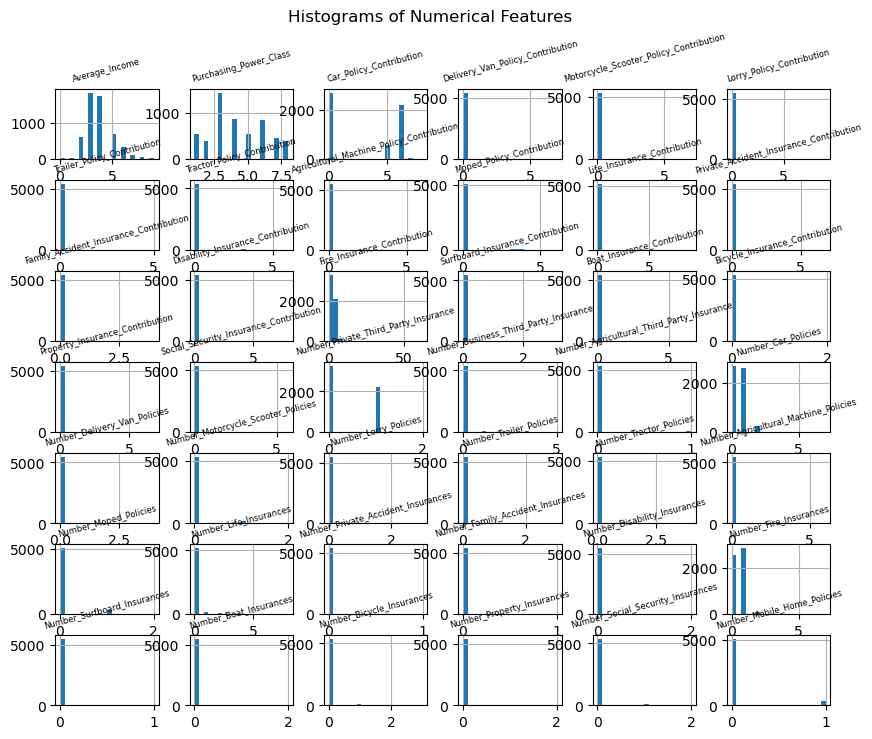

In [1205]:
Insurance_df[Numerical_Columns].iloc[:,34:].hist(figsize = (10, 8), bins = 20)
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(Insurance_df[Numerical_Columns].columns[34+i], rotation=15, fontsize=6)

plt.suptitle("Histograms of Numerical Features")
plt.show()

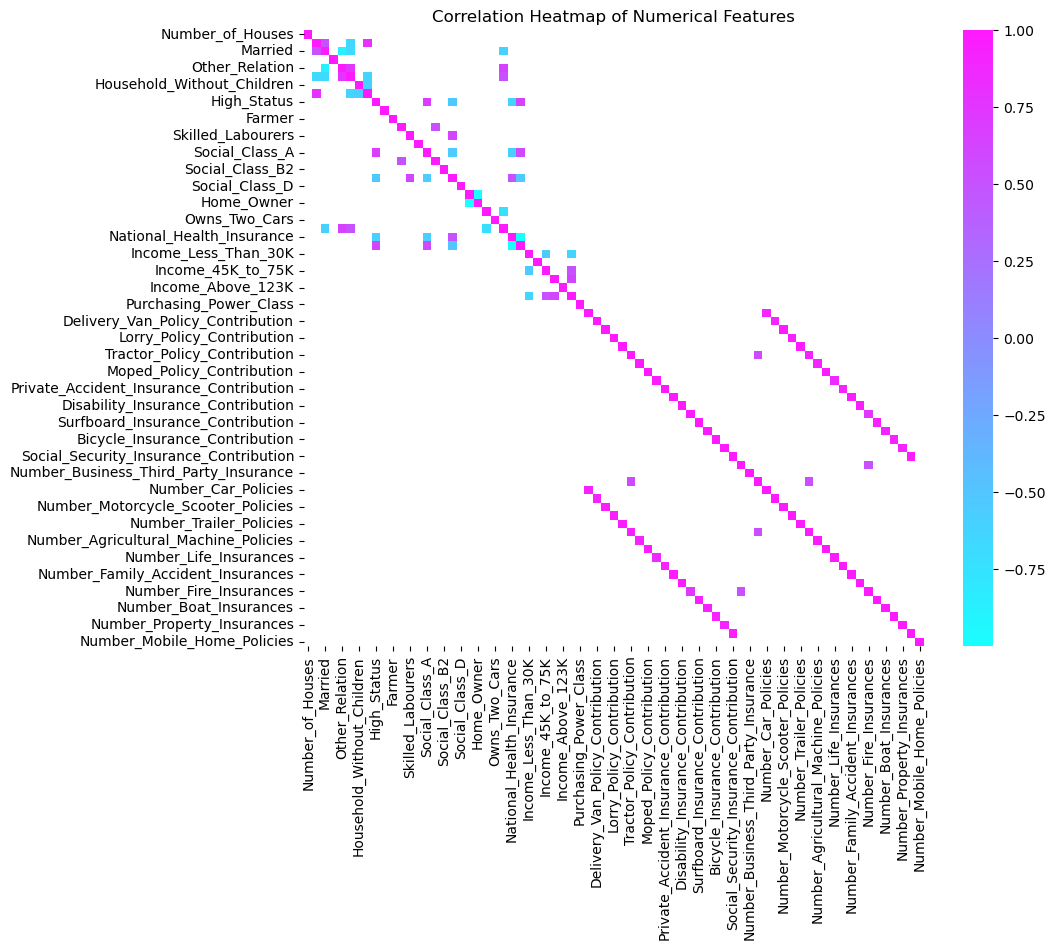

In [547]:
# To identify the relation between the numeric features within the dataset
import seaborn as sns

#for readability, a threshold of 0.5 was used for indicating the correlation between features
corr_matrix = df.corr()
strong_matrix = corr_matrix[(corr_matrix > 0.5)|(corr_matrix < -0.5)]

plt.figure(figsize=(10, 8))
sns.heatmap(strong_matrix, cmap = 'cool',annot = False ,alpha = 0.9)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

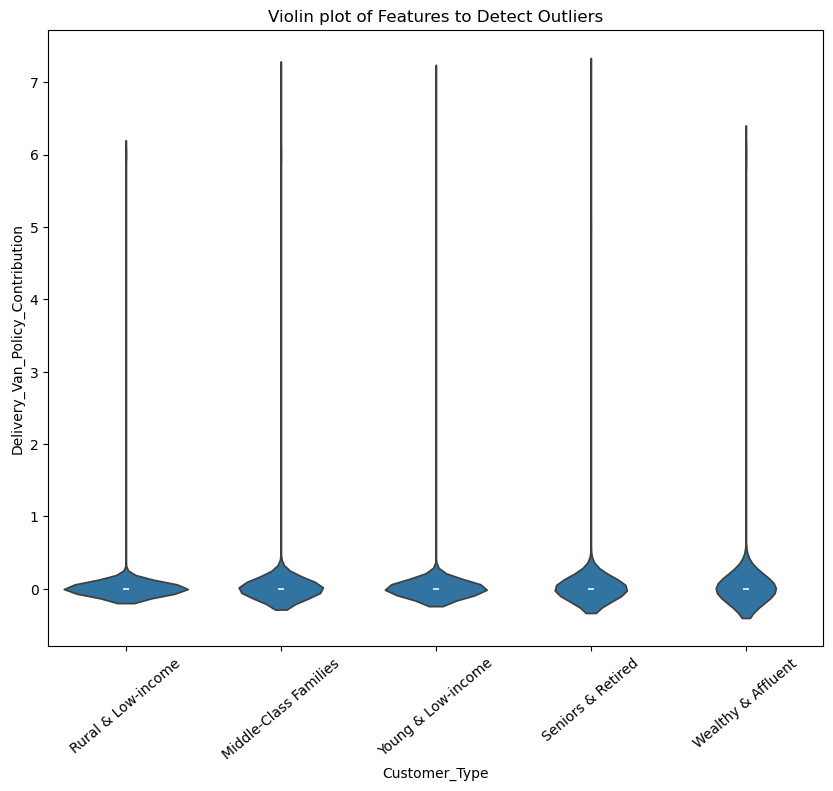

In [598]:
plt.figure(figsize=(10,8))
sns.violinplot(x = Insurance_df['Customer_Type'], y = Insurance_df['Delivery_Van_Policy_Contribution'], data = Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('Delivery_Van_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Violin plot of Features to Detect Outliers")
plt.show()

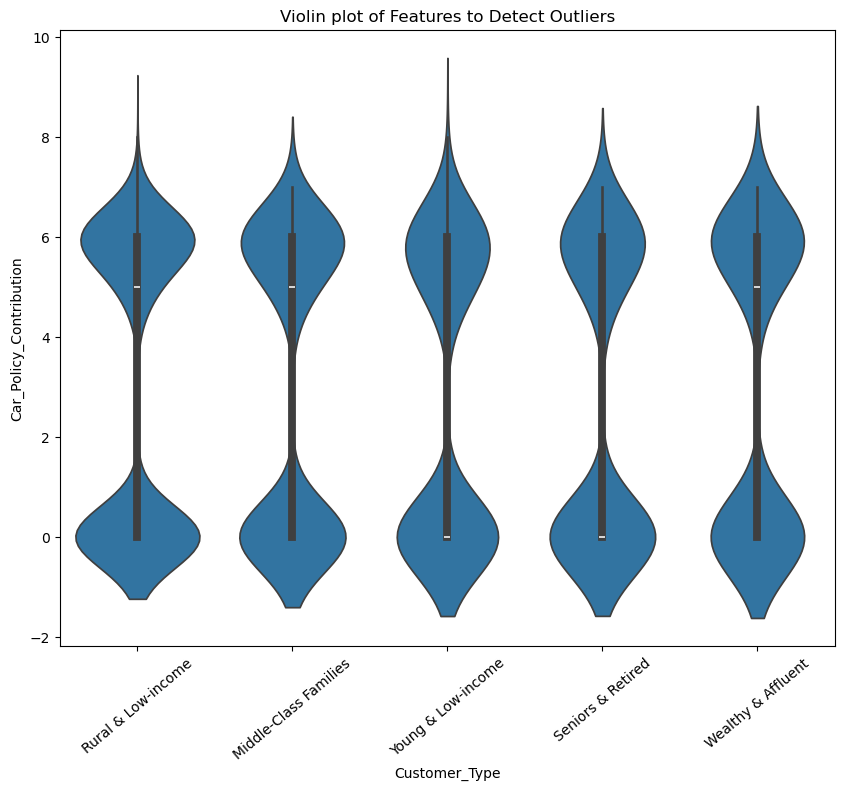

In [596]:
plt.figure(figsize=(10,8))
sns.violinplot(x = Insurance_df['Customer_Type'], y = Insurance_df['Car_Policy_Contribution'], data = Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('Car_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Violin plot of Features to Detect Outliers")
plt.show()

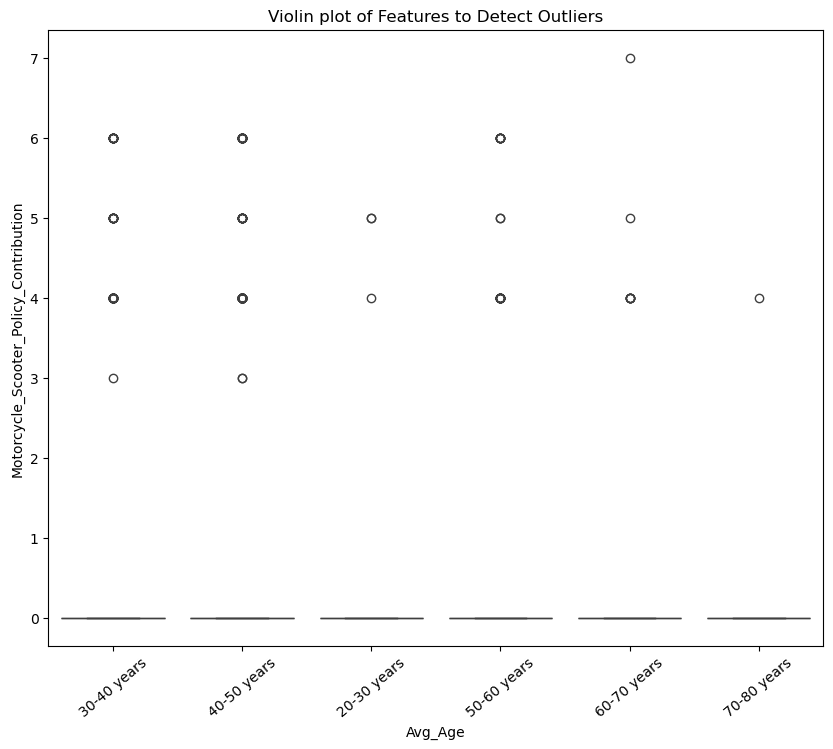

In [775]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Avg_Age'], y = Insurance_df['Motorcycle_Scooter_Policy_Contribution'], data = Insurance_df)
plt.xlabel('Avg_Age')
plt.ylabel('Motorcycle_Scooter_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Violin plot of Features to Detect Outliers")
plt.show()

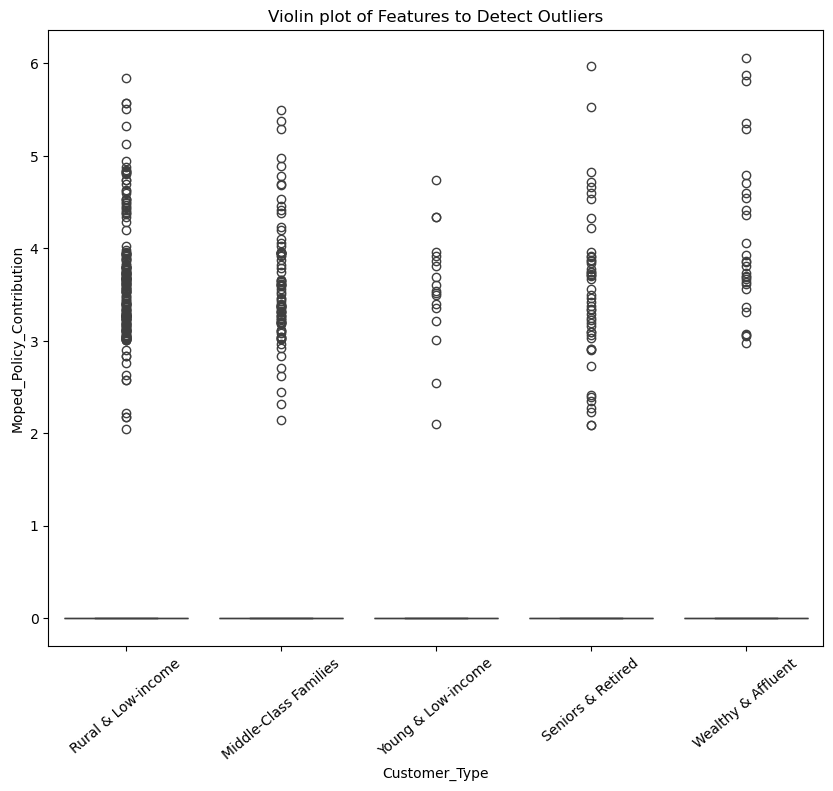

In [777]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Customer_Type'], y = Insurance_df['Moped_Policy_Contribution'], data = Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('Moped_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Violin plot of Features to Detect Outliers")
plt.show()

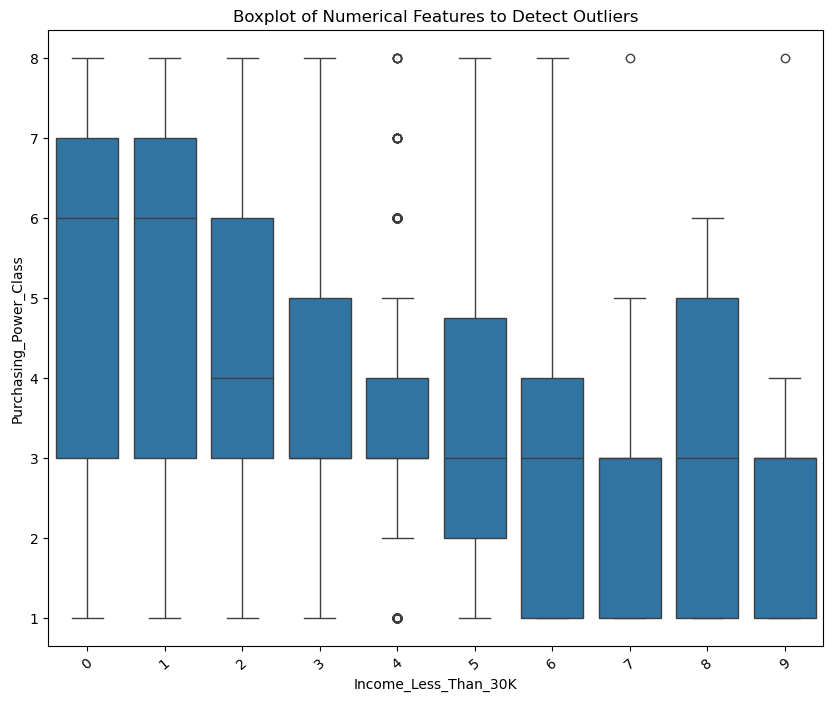

In [600]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Income_Less_Than_30K'], y = Insurance_df['Purchasing_Power_Class'], data = Insurance_df)
plt.xlabel('Income_Less_Than_30K')
plt.ylabel('Purchasing_Power_Class')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

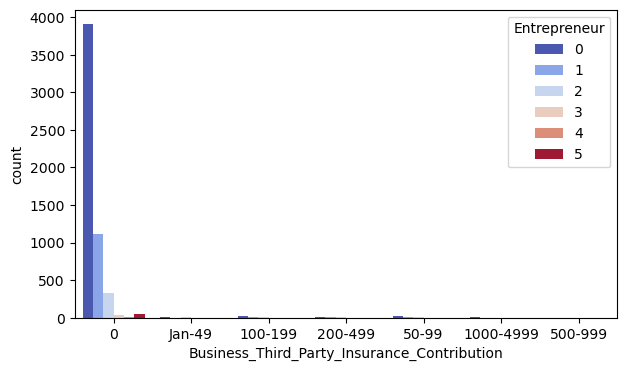

In [860]:
plt.figure(figsize=(7,4))
sns.countplot(x="Business_Third_Party_Insurance_Contribution", hue='Entrepreneur', palette="coolwarm", data=Insurance_df)
plt.show()

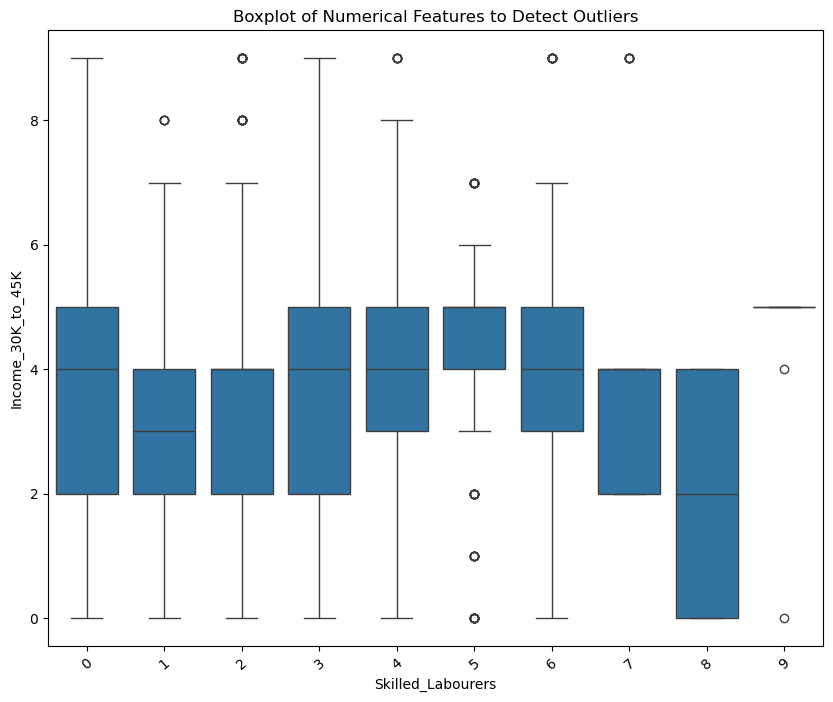

In [650]:
plt.figure(figsize=(10,8))
sns.boxplot(x=Insurance_df['Skilled_Labourers'], y = Insurance_df['Income_30K_to_45K'], data=Insurance_df)
plt.xlabel('Skilled_Labourers')
plt.ylabel('Income_30K_to_45K')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

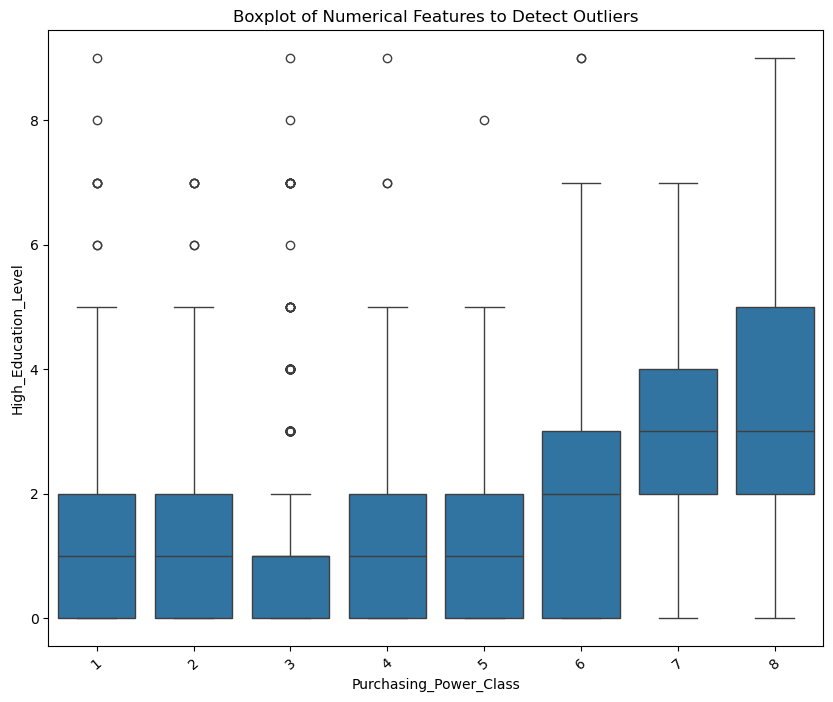

In [690]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Purchasing_Power_Class'], y = Insurance_df['High_Education_Level'], data=Insurance_df)
plt.ylabel('High_Education_Level')
plt.xlabel('Purchasing_Power_Class')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

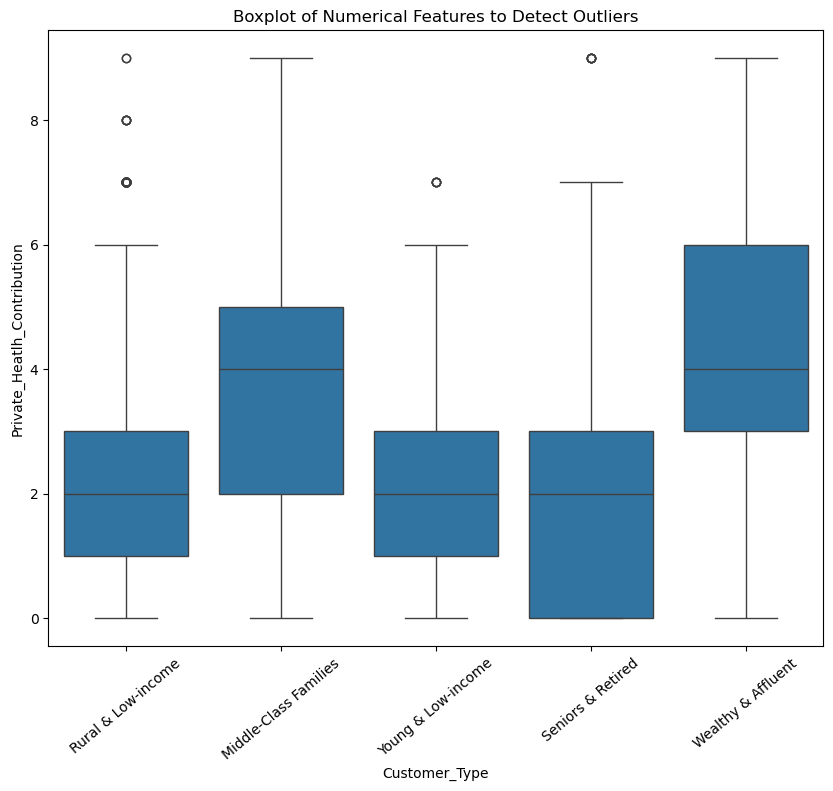

In [692]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Customer_Type'], y = Insurance_df['Private_Health_Insurance'], data=Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('Private_Heatlh_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

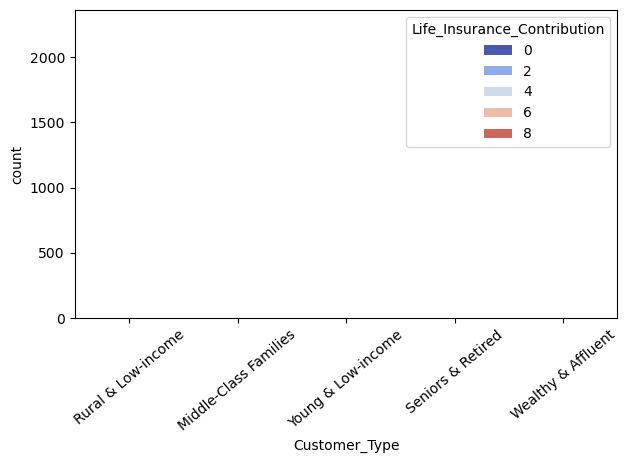

In [868]:
plt.figure(figsize=(7,4))
sns.countplot(x="Customer_Type", hue='Life_Insurance_Contribution', palette="coolwarm", data=Insurance_df)
plt.xticks(rotation = 40)
plt.show()

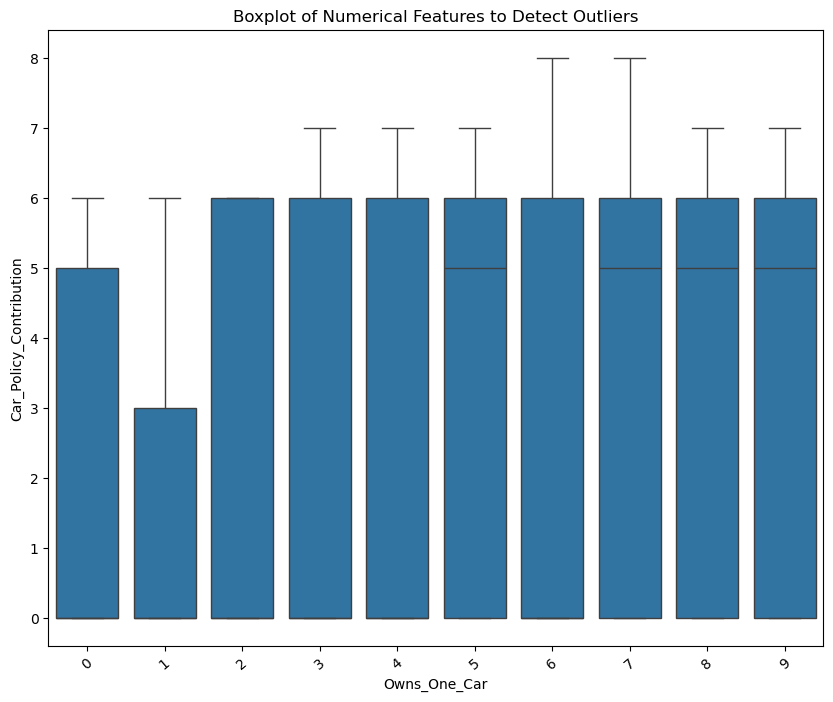

In [721]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Owns_One_Car'], y = Insurance_df['Car_Policy_Contribution'], data=Insurance_df)
plt.xlabel('Owns_On_Car')
plt.ylabel('Car_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

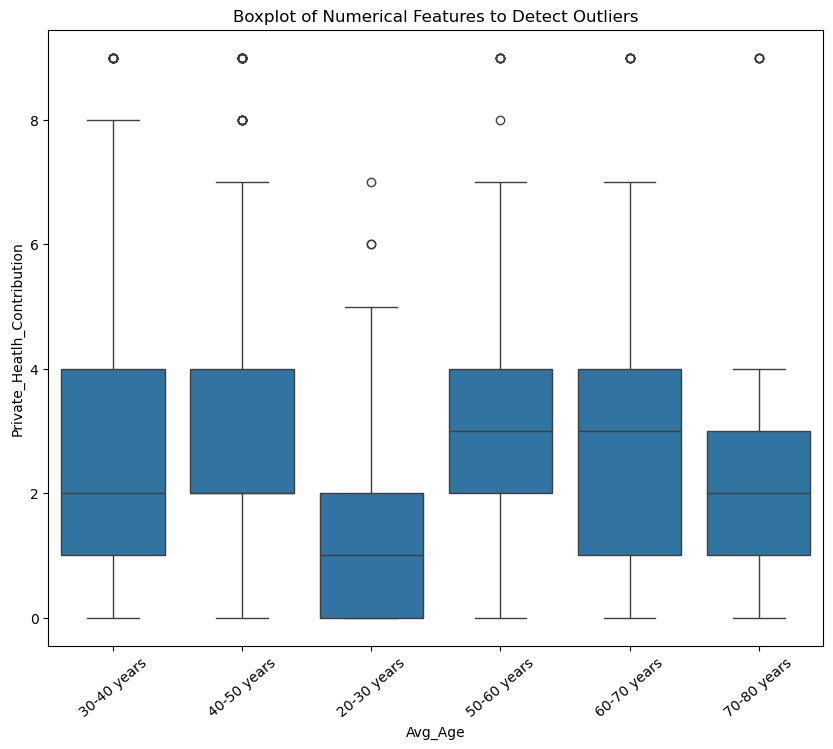

In [672]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Avg_Age'], y = Insurance_df['Private_Health_Insurance'], data=Insurance_df)
plt.xlabel('Avg_Age')
plt.ylabel('Private_Heatlh_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

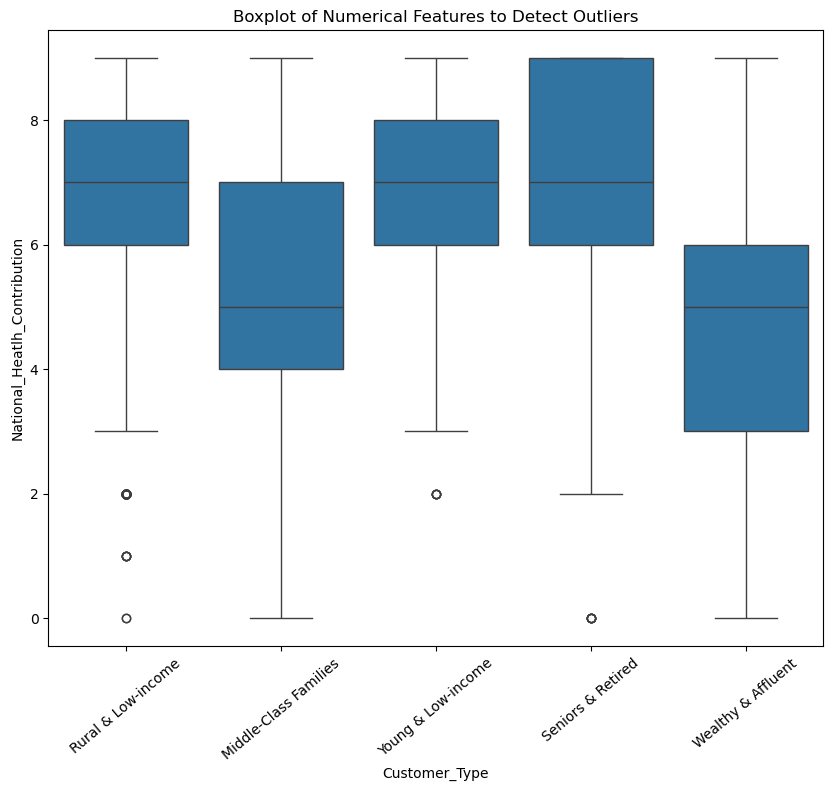

In [704]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Customer_Type'], y = Insurance_df['National_Health_Insurance'], data=Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('National_Heatlh_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

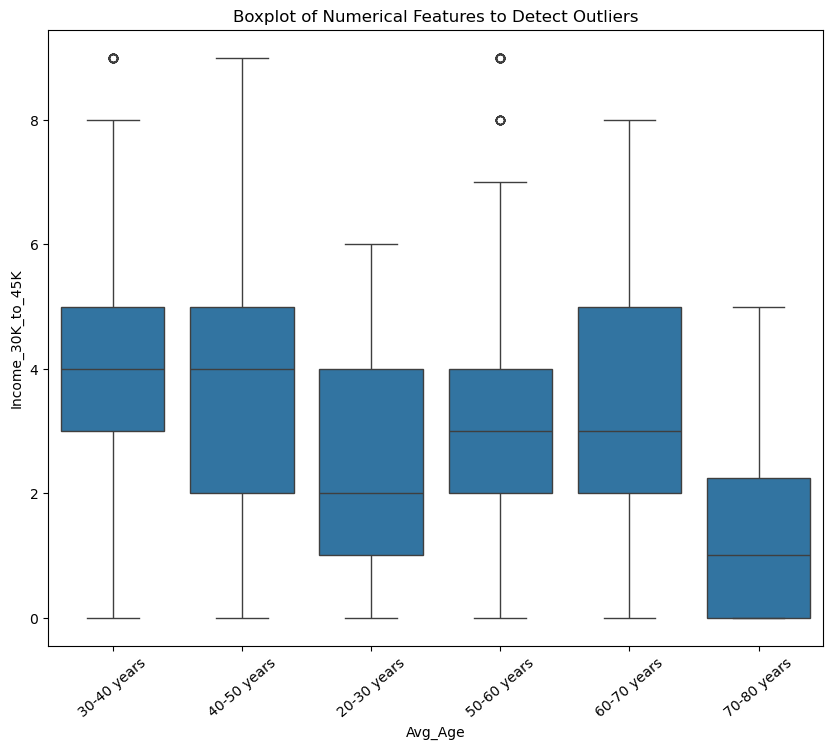

In [727]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Avg_Age'], y = Insurance_df['Income_30K_to_45K'], data=Insurance_df)
plt.xlabel('Avg_Age')
plt.ylabel('Income_30K_to_45K')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

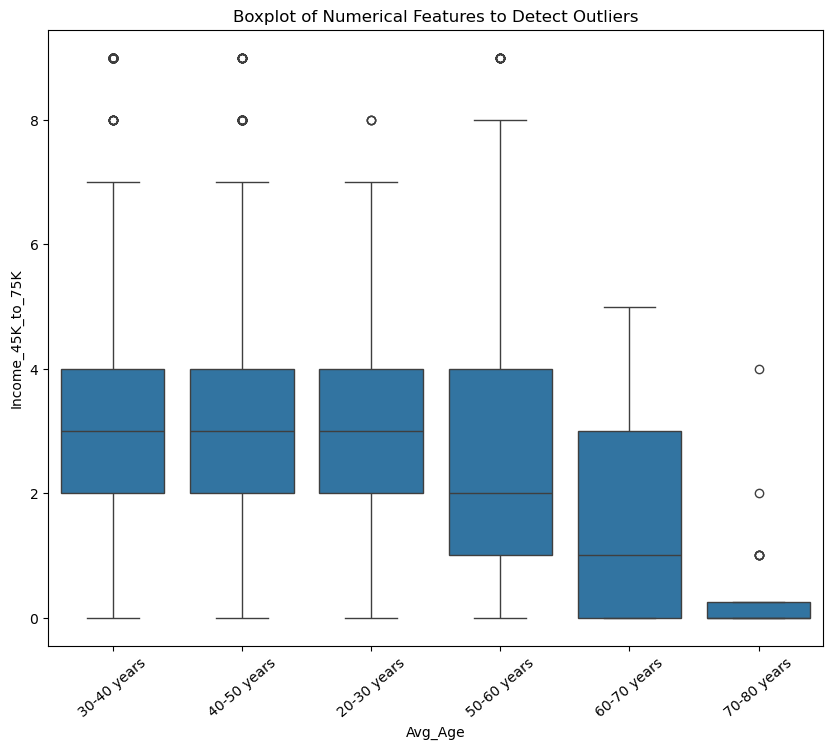

In [725]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Avg_Age'], y = Insurance_df['Income_45K_to_75K'], data=Insurance_df)
plt.xlabel('Avg_Age')
plt.ylabel('Income_45K_to_75K')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

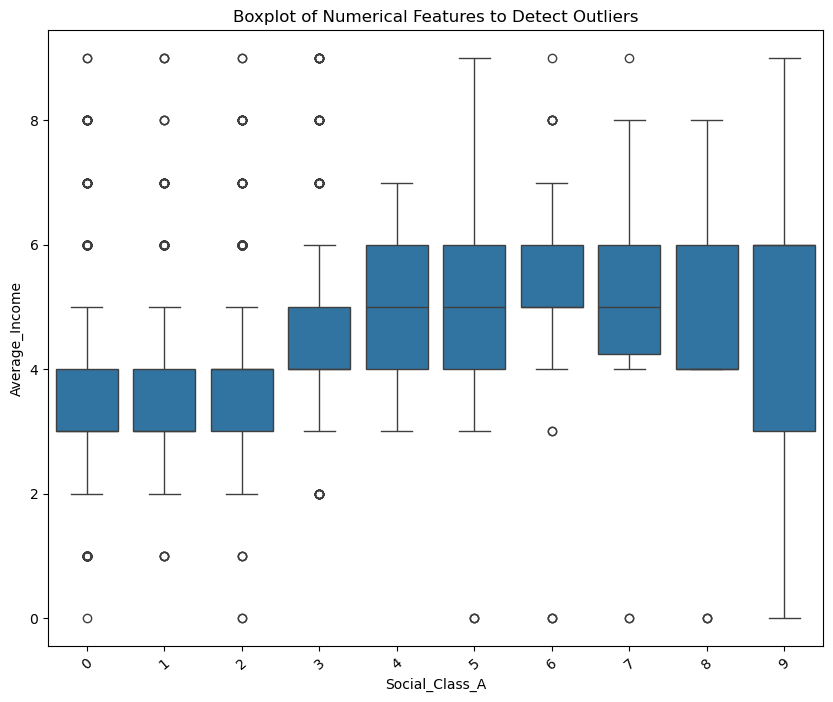

In [737]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Social_Class_A'], y = Insurance_df['Average_Income'], data=Insurance_df)
plt.xlabel('Social_Class_A')
plt.ylabel('Average_Income')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

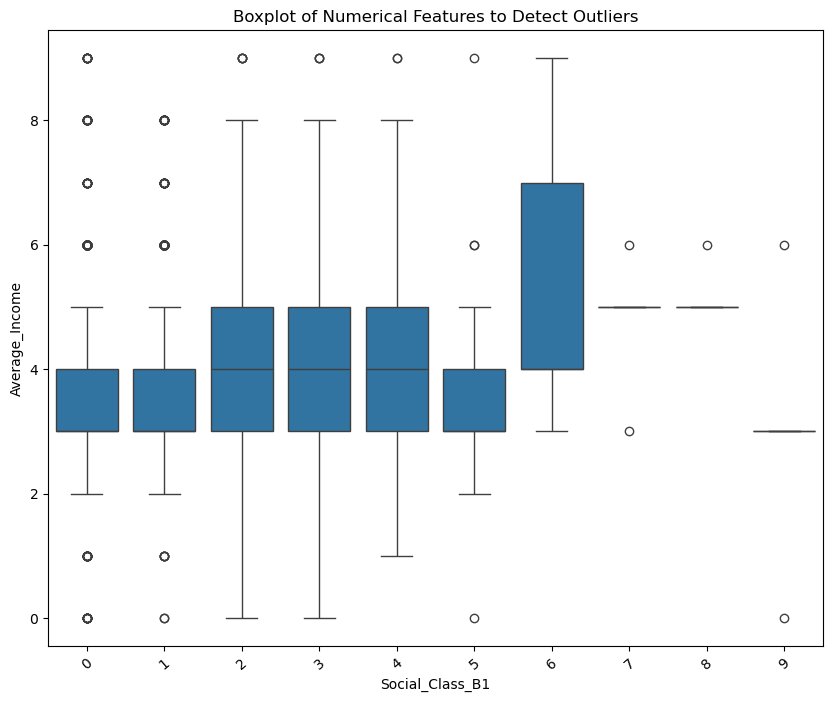

In [735]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Social_Class_B1'], y = Insurance_df['Average_Income'], data=Insurance_df)
plt.xlabel('Social_Class_B1')
plt.ylabel('Average_Income')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

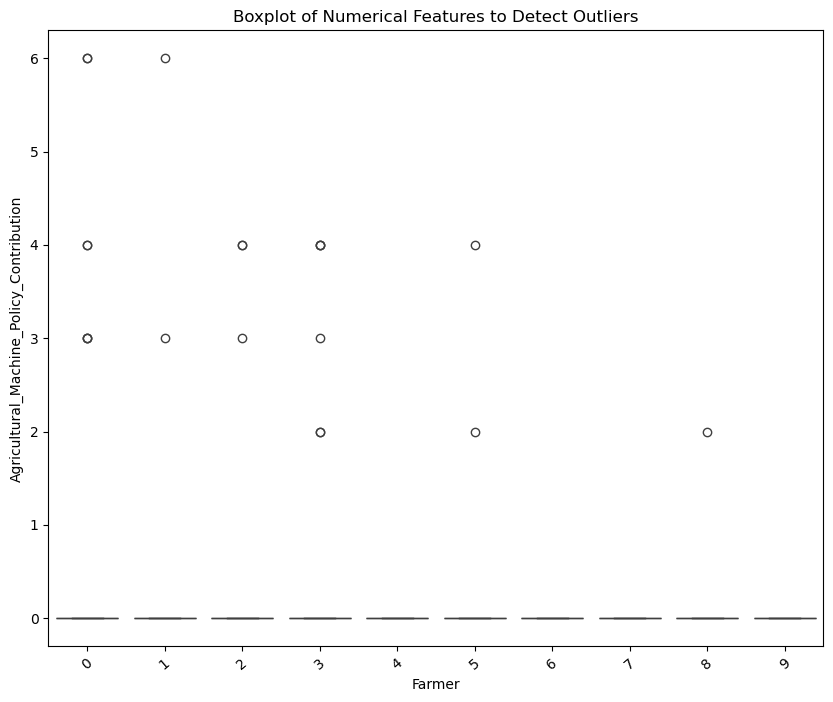

In [949]:
plt.figure(figsize=(10,8))
sns.boxplot(x=Insurance_df['Farmer'], 
                y=Insurance_df['Agricultural_Machine_Policy_Contribution'], data = Insurance_df)
plt.xlabel('Farmer')
plt.ylabel('Agricultural_Machine_Policy_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

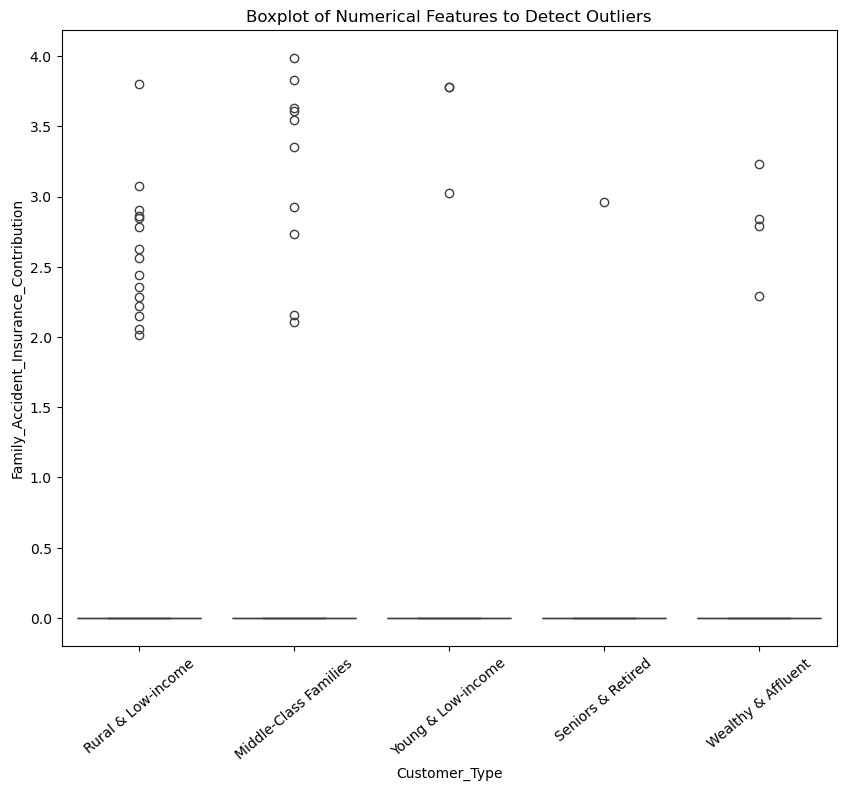

In [749]:
plt.figure(figsize=(10,8))
sns.boxplot(x = Insurance_df['Customer_Type'], y = Insurance_df['Family_Accident_Insurance_Contribution'], data=Insurance_df)
plt.xlabel('Customer_Type')
plt.ylabel('Family_Accident_Insurance_Contribution')
plt.xticks(rotation = 40)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

In [1648]:
#To Verify whether the Numerical Featuers in the Dataset are skewed towards 0 / Nan.

check_columns_for_zeros_in_object = Insurance_df.iloc[:, 40:42]
check_columns_for_zeros_in_numeric = Insurance_df.iloc[:, 42:83]

check_columns_for_zeros_in_object.eq('0').sum()

Business_Third_Party_Insurance_Contribution        5442
Agricultural_Third_Party_Insurance_Contribution    5403
dtype: int64

In [1650]:
check_columns_for_zeros_in_numeric.eq(0).sum() #number of zeros within each feature. The higher the zeros the less it provides useful information to the data

Car_Policy_Contribution                      2690
Delivery_Van_Policy_Contribution             5454
Motorcycle_Scooter_Policy_Contribution       5312
Lorry_Policy_Contribution                    5512
Trailer_Policy_Contribution                  5442
Tractor_Policy_Contribution                  5382
Agricultural_Machine_Policy_Contribution     5500
Moped_Policy_Contribution                    5096
Life_Insurance_Contribution                  5182
Private_Accident_Insurance_Contribution      5440
Family_Accident_Insurance_Contribution       5436
Disability_Insurance_Contribution            5427
Fire_Insurance_Contribution                  2497
Surfboard_Insurance_Contribution             5466
Boat_Insurance_Contribution                  5440
Bicycle_Insurance_Contribution               5326
Property_Insurance_Contribution              5425
Social_Security_Insurance_Contribution       5392
Number_Private_Third_Party_Insurance         3265
Number_Business_Third_Party_Insurance        5391


In [1870]:
nan_count = Insurance_df[Categorical_Columns].isnull().sum()  # Count NANs per column

print('Columns with Null Values:\n',nan_count)

Columns with Null Values:
 Customer_Type                                       0
Avg_Age                                            14
Household_Profile                                   0
Private_Third_Party_Insurance_Contribution          9
Business_Third_Party_Insurance_Contribution         0
Agricultural_Third_Party_Insurance_Contribution     0
Mobile_Home_Policies                               65
dtype: int64


In [1872]:
# Check for columns in Numerical_Columns with no null values
null_numerical_columns = Insurance_df[Numerical_Columns].isnull().sum()
zero_numerical_columns = Insurance_df[Numerical_Columns].eq(0).sum()
# Display the columns with no null values
print("Numerical columns with zeros values:")
print(zero_numerical_columns)
print("\n")
print("Numerical columns with Null Values:") 
print(null_numerical_columns)

Numerical columns with zeros values:
Number_of_Houses                        0
Avg_Household_Size                      0
Married                                61
Living_Together                      2320
Other_Relation                       1105
                                     ... 
Number_Boat_Insurances               5491
Number_Bicycle_Insurances            5377
Number_Property_Insurances           5428
Number_Social_Security_Insurances    5395
Number_Mobile_Home_Policies          5119
Length: 76, dtype: int64


Numerical columns with Null Values:
Number_of_Houses                      0
Avg_Household_Size                    0
Married                               0
Living_Together                       0
Other_Relation                        0
                                     ..
Number_Boat_Insurances                0
Number_Bicycle_Insurances             0
Number_Property_Insurances           49
Number_Social_Security_Insurances    49
Number_Mobile_Home_Policies          7

In [1874]:
Insurance_df['Business_Third_Party_Insurance_Contribution'].unique()

array(['0', 'Jan-49', '100-199', '200-499', '50-99', '1000-4999',
       '500-999'], dtype=object)

# Data Dictionary

+ Displays the summary of the features present in the dataset
+ Statistical Summary
+ The dictionary helps the developer to get an idea of the information of the columns

The number of zeros in the dataset are more than 50 percent. It just shows that we will have to analyse the dataset based on the 

# Preprocessing and Cleaning

+ Once getting the dataset, check for the missing values within the features.
+ Remove the features that does not add much into the analysis

### Replace the NAN values in the features

+ Some of the features from their visualization indicates that some of the features are skewed towards 0. So for more precise classification, we will have to reduce it's dimensionality. 

In [13]:
#To Fill in all the Nan values among the Categorical Features with Unknown
Insurance_df[Categorical_Columns] = Insurance_df[Categorical_Columns].apply(lambda x: x.fillna('Unknown'))

In [15]:
Categorical_Columns.remove('Customer_Type')
Insurance_df[Categorical_Columns].isnull().sum()

Avg_Age                                            0
Household_Profile                                  0
Private_Third_Party_Insurance_Contribution         0
Business_Third_Party_Insurance_Contribution        0
Agricultural_Third_Party_Insurance_Contribution    0
Mobile_Home_Policies                               0
dtype: int64

In [17]:
# There is a unique value within the feature that needs to be replaced appropriately rather than removed.

valid_categories = ['0', '100-199', '200-499', '50-99', '1000-4999', '500-999']

Insurance_df['Business_Third_Party_Insurance_Contribution'] = Insurance_df['Business_Third_Party_Insurance_Contribution'].apply(lambda x : x if x in valid_categories else 'Other')

In [19]:
Insurance_df['Business_Third_Party_Insurance_Contribution'].unique()

array(['0', 'Other', '100-199', '200-499', '50-99', '1000-4999',
       '500-999'], dtype=object)

In [21]:
Insurance_df.columns

Index(['Customer_Type', 'Number_of_Houses', 'Avg_Household_Size', 'Avg_Age',
       'Household_Profile', 'Married', 'Living_Together', 'Other_Relation',
       'Singles', 'Household_Without_Children', 'Household_With_Children',
       'High_Education_Level', 'Medium_Education_Level', 'Low_Education_Level',
       'High_Status', 'Entrepreneur', 'Farmer', 'Middle_Management',
       'Skilled_Labourers', 'Unskilled_Labourers', 'Social_Class_A',
       'Social_Class_B1', 'Social_Class_B2', 'Social_Class_C',
       'Social_Class_D', 'Rented_House', 'Home_Owner', 'Owns_One_Car',
       'Owns_Two_Cars', 'Owns_No_Car', 'National_Health_Insurance',
       'Private_Health_Insurance', 'Income_Less_Than_30K', 'Income_30K_to_45K',
       'Income_45K_to_75K', 'Income_75K_to_122K', 'Income_Above_123K',
       'Average_Income', 'Purchasing_Power_Class',
       'Private_Third_Party_Insurance_Contribution',
       'Business_Third_Party_Insurance_Contribution',
       'Agricultural_Third_Party_Insurance_

In [24]:
Insurance_df[Numerical_Columns].isnull().sum()

Number_of_Houses                      0
Avg_Household_Size                    0
Married                               0
Living_Together                       0
Other_Relation                        0
                                     ..
Number_Boat_Insurances                0
Number_Bicycle_Insurances             0
Number_Property_Insurances           49
Number_Social_Security_Insurances    49
Number_Mobile_Home_Policies          74
Length: 76, dtype: int64

In [26]:
Insurance_df[Numerical_Columns] = Insurance_df[Numerical_Columns].apply(lambda x : x.fillna(x.median()))


In [28]:
Insurance_df[Numerical_Columns].isnull().sum()

Number_of_Houses                     0
Avg_Household_Size                   0
Married                              0
Living_Together                      0
Other_Relation                       0
                                    ..
Number_Boat_Insurances               0
Number_Bicycle_Insurances            0
Number_Property_Insurances           0
Number_Social_Security_Insurances    0
Number_Mobile_Home_Policies          0
Length: 76, dtype: int64

### Cleaning the Dataset Before Train_test_split

+ To remove all the extreme outliers before actual analysis

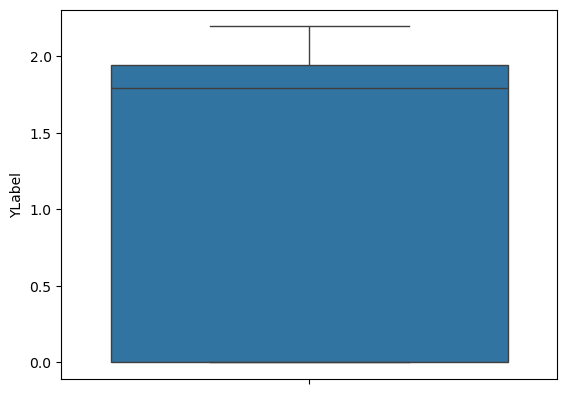

In [1760]:
# Boxplot was used to detect the Outliers within the Dataset, as the values just remained between 0-9. there wasn't much. 
#Yet I used log1p ] log(1+x) for normalizing the values within

Insurance_df['Car_Policy_Contribution'] = np.log1p(Insurance_df['Car_Policy_Contribution'])
sns.boxplot(y = Insurance_df['Car_Policy_Contribution'], data = Insurance_df)
plt.ylabel('YLabel')
plt.show()

## Feature Selection 

+ With the help of feature Selection we'd able to find which ever columns/attributes would be helpful for classifying the information according to target_variable

In [1110]:
#!pip install category_encoders

In [ ]:
from 